In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [422]:
cols=['fLength', 'fWidth', 'fSize', 'fConc','fConc1' ,'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df=pd.read_csv('/content/drive/MyDrive/Machine Learninng/magic+gamma+telescope/magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [423]:
# These are the predicted final values
pd.unique(df.values[:,-1])

array(['g', 'h'], dtype=object)

In [424]:
# converting the g and h into 1 and 0
df['class']= (df['class'] == 'g').astype(int)

In [425]:

df['class'].unique()

array([1, 0])

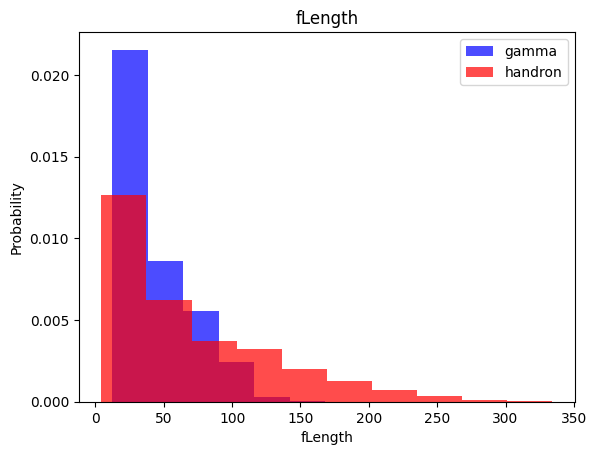

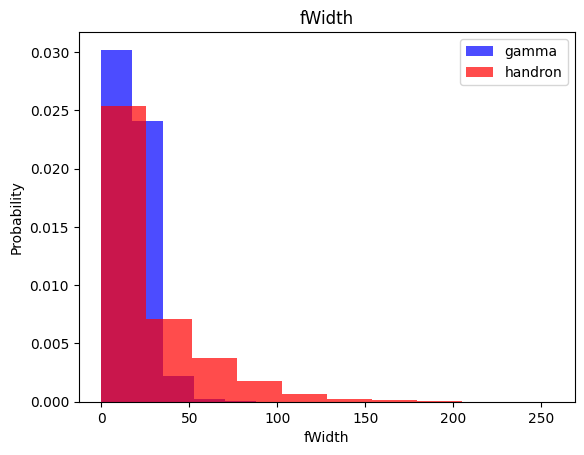

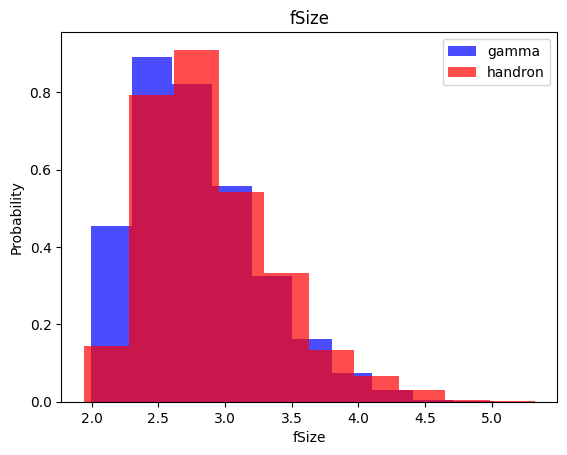

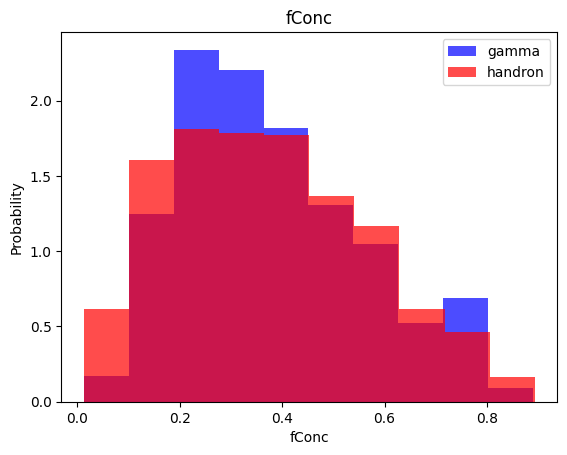

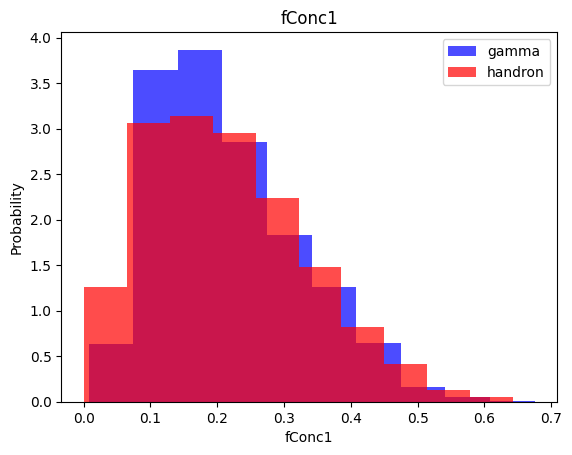

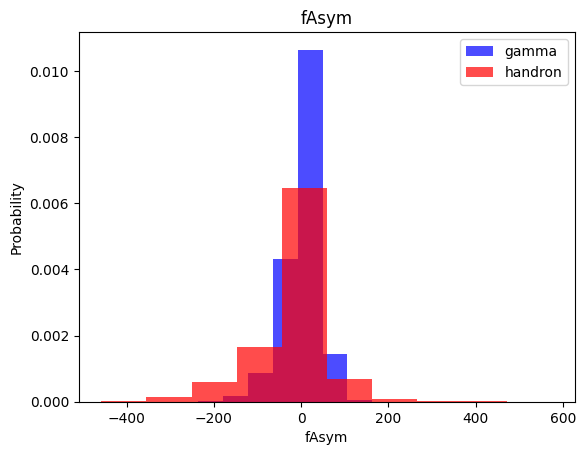

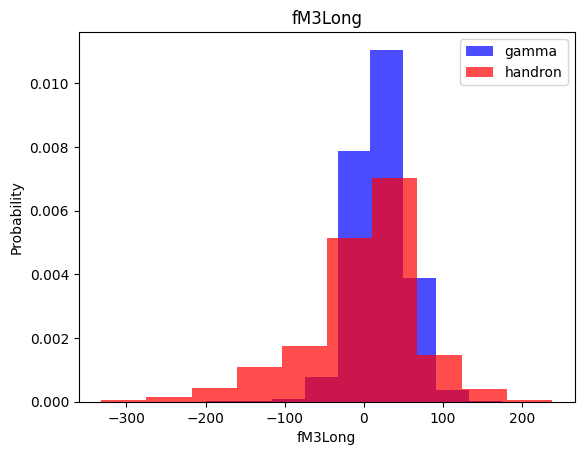

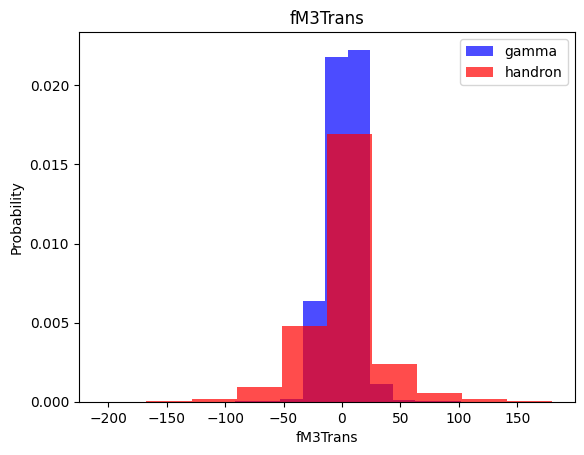

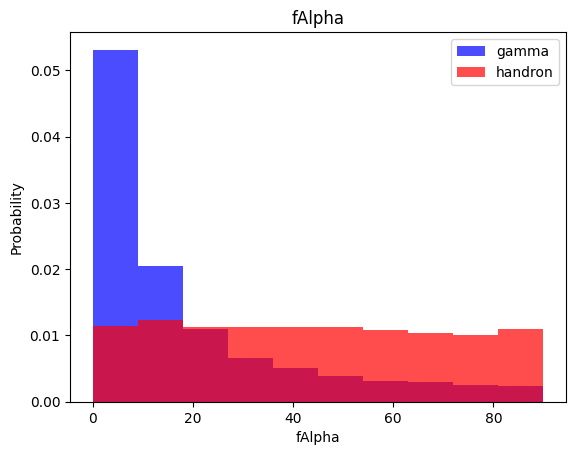

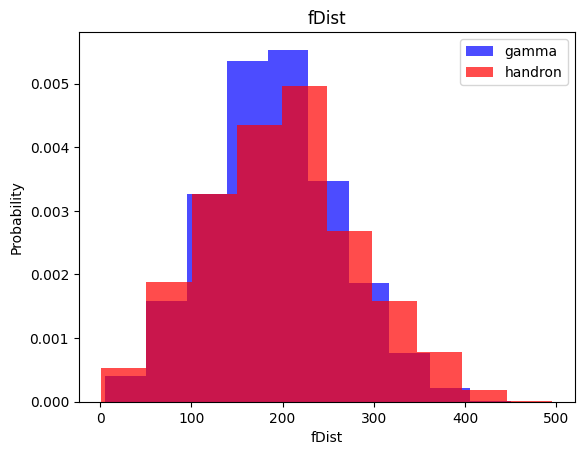

In [426]:
# Plotting them into plt
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='handron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Train Validation Test Dat-Set

In [427]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [428]:
# np.split() => split the data horizandle-wise
# .sample(frc=1) => it shuffle the over data-set by rows
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
# print(test, valid)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [429]:
# hardon value very low compare to gamma
print(len(train[train['class']==1])) # gamma
print(len(train[train['class']==0])) # hardon

7403
4009


In [430]:
print(train.shape)
print(valid.shape)
print(test.shape)

(11412, 11)
(3804, 11)
(3804, 11)


Normalize and Pre-Processing the data-set using **StandardScaler() and RandomOverSampler()**

In [431]:
# dataframe.columns[:-1] => Taking the all columns expect last one('class')
# dataframe[dataframe.columns[:-1]].values => taking the all column values
def scale_dataset(dataframe, over_sample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  # print("X size:", len(X))
  # print("y size:", len(y))

  # Normalize the feature input data
  scaler=StandardScaler()
  X = scaler.fit_transform(X)

  if over_sample:
    ros=RandomOverSampler()
    X, y=ros.fit_resample(X, y)
    # print("X size:", len(X))
    # print("y size:", len(y))


  # fitting the resample data which is X and
  data = np.hstack((X, np.reshape(y, (-1, 1)))) # changing 1D array into 2-D array (-1) tells no.of rows, (1) tells one no.of column

  return data, X, y

Passing the train, valid, test data-sets and
stored the output corresponding variables

In [432]:
train, X_train, y_train = scale_dataset(train, over_sample=True)
valid, X_valid, y_valid = scale_dataset(valid, over_sample=False)
test, X_test, y_test = scale_dataset(test, over_sample=False)

In [433]:
print(train.shape)
print(X_train.shape)
print(y_train.shape)

(14806, 11)
(14806, 10)
(14806,)


In [434]:
print(y_train)
print(y_valid)
print(y_test)

[1 1 0 ... 0 0 0]
[1 1 1 ... 0 0 1]
[0 0 1 ... 1 1 0]


# KNN

In [435]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [436]:
# .fit() does in KNN
# Unlike other algorithms, KNN does not calculate equations.
# It simply stores the training data in memory.

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [437]:
# Passing the training data-set as input feautures
y_pred = knn_model.predict(X_train)

print(classification_report(y_train, y_pred))
print("Accuracy:", accuracy_score(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7403
           1       0.95      0.92      0.93      7403

    accuracy                           0.94     14806
   macro avg       0.94      0.94      0.94     14806
weighted avg       0.94      0.94      0.94     14806

Accuracy: 0.9357017425368094


In [438]:
# print(type(y_pred))
# print(type(y_train))
# print(len(y_pred))
# print(len(y_train))

# Observing the output
print(len(X_train))
print(np.unique(y_pred, return_counts=True))
print(np.unique(y_train, return_counts=True))

14806
(array([0, 1]), array([7637, 7169]))
(array([0, 1]), array([7403, 7403]))
